In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [6]:
# English Alphabet

eng_alphabet = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

In [ ]:
# function to read an image and grayscale it

B
28

[[221 221 222 222 222 222 222 222 222 223 223 222 223 223 223 223 223 223
  222 222 222 222 222 222 222 222 222]
 [222 222 222 222 222 222 223 223 223 223 223 223 223 224 223 224 223 222
  222 222 222 222 222 222 222 222 222]
 [222 222 222 223 222 222 223 223 223 224 224 224 224 224 224 223 224 222
  222 222 222 223 222 222 222 222 222]
 [222 222 222 223 223 223 224 224 224 224 224 223 217 219 224 224 224 208
  210 224 223 223 223 222 223 222 222]
 [223 223 222 223 223 224 224 224 224 224 224 223 205 214 226 224 222 207
  213 225 223 223 224 222 223 222 222]
 [223 223 223 224 224 223 224 224 220 221 224 219 205 228 225 224 221 207
  217 226 224 224 223 223 223 223 223]
 [224 223 224 224 224 224 224 223 204 210 225 213 205 232 225 224 216 205
  221 225 224 224 224 223 223 223 223]
 [224 224 224 224 224 224 224 220 200 215 223 210 207 228 225 224 215 211
  226 224 224 224 224 224 223 223 223]
 [224 224 224 225 225 224 224 212 200 218 215 206 207 227 225 217 213 215
  226 225 224 22

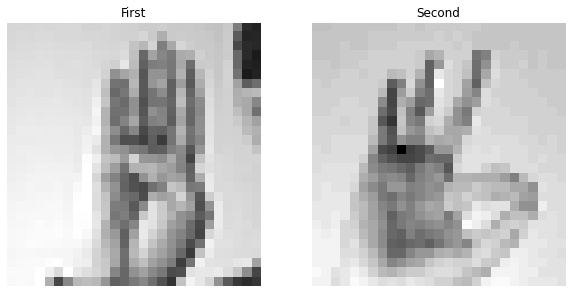

In [7]:
# Showing Sign Image and Letter

df = pd.read_csv(r'.\letters\sign_mnist_test.csv')
# print(df.iloc[0].to_string(index=False))

fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)

img_index = 105
arr = df.iloc[img_index, 1: ].values
print(eng_alphabet[df.iloc[img_index, 0]])
img_arr = pd.DataFrame(arr.reshape(-1, 28)).set_index(0)
plt.imshow(img_arr, cmap='gray', vmin=0, vmax=255)

plt.axis('off')
plt.title("First")

fig.add_subplot(1, 2, 2)

youimg = cv2.imread('gray.png')
youimg = cv2.flip(youimg, 1)
youimg = cv2.resize(youimg, (27, 28))
youimg = cv2.cvtColor(youimg, cv2.COLOR_BGR2GRAY)
plt.imshow(youimg, cmap='gray')

plt.axis('off')
plt.title("Second")

print(len(img_arr))
print()
print(youimg)


In [3]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=9, algorithm='ball_tree')

train = pd.read_csv(r'.\letters\sign_mnist_train.csv')
test = pd.read_csv(r'.\letters\sign_mnist_test.csv')

x_train = train.loc[:, train.columns != 'label'].values
y_train = train['label'].values

x_test = test.loc[:, train.columns != 'label'].values
y_test = test['label'].values

# print(x_train, y_train)
# print(x_train.size)
# print(x_test, y_test)

KNN.fit(x_train, y_train)


KNeighborsClassifier(algorithm='ball_tree', n_neighbors=9)

AI:  R


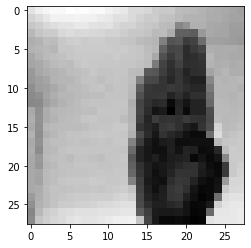

In [9]:
# Let us use the trained KNN to predict the type of flower if its sepal length = 5 and sepal_width = 3 We can use the .predict method to do so.
itest = 105

savedIMG = cv2.imread('gray.png')
savedIMG = cv2.flip(savedIMG, 1)
savedIMG = cv2.resize(savedIMG, (28, 28))
savedIMG = cv2.cvtColor(savedIMG, cv2.COLOR_BGR2GRAY)

plt.imshow(savedIMG, cmap='gray')
# print(savedIMG.shape[0], savedIMG.shape[1])

savedIMG = savedIMG.reshape(1, -1)
# print(savedIMG.size)
# savedIMG = savedIMG.transpose(2, 0, 1).reshape(3, -1)
# print(savedIMG)

# predicted = KNN.predict([test.iloc[itest, 1:]])
predicted = KNN.predict(savedIMG)

print("AI: ", eng_alphabet[predicted[0]])

# arr = test.iloc[itest, 1: ].values
# print("TRUE: ", eng_alphabet[test.iloc[itest, 0]])
# img_arr = pd.DataFrame(arr.reshape(-1, 28)).set_index(0)
# plt.imshow(img_arr, cmap='gray', vmin=0, vmax=255)

# print("Accuracy: ", KNN.score(x_test, y_test))

In [93]:
# Opening cv2 Webcam

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from cvzone.HandTrackingModule import HandDetector

cap = cv2.VideoCapture(1, cv2.CAP_DSHOW)
detector = HandDetector(detectionCon=0.8, maxHands=1)

try:
    while True:
        ret, frame = cap.read()
        
        hands = detector.findHands(frame, draw=False)

        # hands, img = detector.findHands(frame)

        # cv2.imshow('Webcam', frame)

        if (hands and hands[0]):
            x, y, w, h = hands[0]['bbox']
            # cx, cy = hands[0]['center']
            
            x -= 30
            y -= 30
            w += 30
            h += 30

            if (w > h):
                # if (y > w/2): y = int(y-w/2)
                h = w
            elif (h > w):
                # if (x > h/2): x = int(x-h/2)
                w = h

            crop_img = frame[y:y+h, x:x+w]
            # flipped = cv2.flip(crop_img, 1)
            cv2.imshow("HAND", crop_img)
            cv2.setWindowProperty("HAND", cv2.WND_PROP_TOPMOST, 1)

            # gray = cv2.cvtColor(crop_img, cv2.COLOR_BGR2GRAY)

            cv2.imwrite("gray.png", crop_img)

        # cv2.imshow('Webcam', frame)

        # if cv2.waitKey(1) == ord('s'):
        #     toPredict = cv2.imread("gray.png")
        #     toPredict = cv2.flip(toPredict, 1)
        #     toPredict = cv2.resize(toPredict, (28, 28))
        #     toPredict = cv2.cvtColor(toPredict, cv2.COLOR_BGR2GRAY)
        #     toPredict = toPredict.reshape(1, -1)
        #     toPredicted = KNN.predict(toPredict)

        #     print("AI: ", eng_alphabet[toPredicted[0]])

        if cv2.waitKey(1) == ord('q'):
            break

except Exception as e:
    print(e)
finally:
    cap.release()
    cv2.destroyAllWindows()


In [ ]:
# Opening cv2 Webcam

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from cvzone.HandTrackingModule import HandDetector

cap = cv2.VideoCapture(1, cv2.CAP_DSHOW)
detector = HandDetector(detectionCon=0.8, maxHands=2)

try:
    while True:
        ret, frame = cap.read()
        
        hands = detector.findHands(frame, draw=True)

        # hands, img = detector.findHands(frame)

        # cv2.imshow('Webcam', frame)

        if (hands and hands[0]):
            x, y, w, h = hands[0][0]['bbox']
            # cx, cy = hands[0]['center']

            # crop_img = frame[y:y+h, x:x+w]
            # flipped = cv2.flip(crop_img, 1)
            # flipped_frame = cv2.flip(frame, 1)
            cv2.imshow("MAIN", frame)
            cv2.setWindowProperty("MAIN", cv2.WND_PROP_TOPMOST, 1)

        if cv2.waitKey(1) == ord('q'):
            break

except Exception as e:
    print(e)
finally:
    cap.release()
    cv2.destroyAllWindows()


# arr123 = test.iloc[105, 1: ].values
# readImg = pd.DataFrame(arr123.reshape(-1, 28)).set_index(0)

# backtorgb = cv2.cvtColor(readImg, cv2.COLOR_GRAY2RGB)
# print(readImg)
# readImg = cv2.imread("gray.png")
# print(readImg)
# # readImg = cv2.resize(readImg, (28, 28))
# # readImg = cv2.cvtColor(readImg, cv2.COLOR_BGR2GRAY)
# # hands = detector.findHands(readImg, draw=True)
# plt.imshow(readImg)
# # cv2.imshow("main", readImg)
# # cv2.waitKey(0)
# # cv2.destroyAllWindows()


In [8]:
rgb = cv2.imread("gray.png")

def gammaCorrection(src, gamma):
    invGamma = 1 / gamma
 
    table = [((i / 255) ** invGamma) * 255 for i in range(256)]
    table = np.array(table, np.uint8)
 
    return cv2.LUT(src, table)
 
gammaImg = gammaCorrection(rgb, 2)

toGray = cv2.cvtColor(gammaImg, cv2.COLOR_BGR2GRAY)

cv2.imwrite("gray.png", toGray)

True

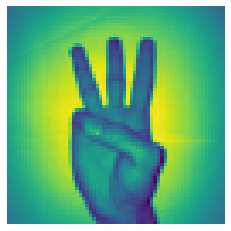

(-0.5, 63.5, 63.5, -0.5)

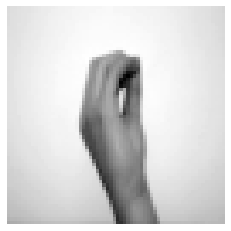

In [ ]:
x_numbers = np.load(r'.\numbers\X.npy')
y_numbers = np.load(r'.\numbers\Y.npy')

# print(x_numbers[700]*255)
# print(y_numbers[400])

	
# image = cv2.imread('123.png')
# print(image.shape)
# image = image.ravel()
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


# print(gray)

# img_arr = pd.DataFrame(gray.reshape(64, 64)).set_index(0)
# plt.imshow(img_arr)
# plt.axis("off")
# plt.show()

# print(image)
# cv2.imshow('Sussy', image)

# print(gray)
# cv2.imshow("BRUH", gray)

# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(x_numbers[700]*255)
plt.axis("off")
plt.show()
plt.imshow(x_numbers[400], cmap='gray')
plt.axis("off")

# plt.imsave('123.png', x_numbers[700]*255, cmap='gray')



In [5]:
# Write the image to a file

import csv
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from cvzone.HandTrackingModule import HandDetector

labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']

detector = HandDetector(detectionCon=0.8, maxHands=1)

# image = cv2.imread('aslabc/asl_alphabet_train/asl_alphabet_train/A/A300.jpg')
# hands = detector.findHands(image, draw=True)
# if (hands and hands[0] and hands[0][0]):
#     print(hands[0][0])
# cv2.imshow("main", image)

# cv2.waitKey(0)
# cv2.destroyAllWindows()

# image = cv2.resize(image, (64, 64))
# image = image.ravel()
# print(image)
# image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# imgplot = plt.imshow(image, cmap='gray')
# plt.show()

# image = image.reshape(1, -1)
# print(image)

# with open('traindots.csv', 'w', encoding='UTF8', newline='') as f:
#     writer = csv.writer(f)

#     header_arr = ['label']
#     for i in range(24):
#         header_arr.append(i)

#     writer.writerow(header_arr)

# with open('traindots.csv', 'a', encoding='UTF8', newline='') as f:
#     writer = csv.writer(f)

#     for i in range(len(labels)):
#         for j in range(1, 3001):
#             image = cv2.imread('aslabc/asl_alphabet_train/asl_alphabet_train/'+labels[i]+'/'+labels[i]+str(j)+'.jpg')
#             # image = cv2.resize(image, (64, 64))
#             # image = image.ravel()
#             hands = detector.findHands(image, draw=True)
#             if (hands and hands[0] and hands[0][0]):
#                 insertData = hands[0][0]['lmList']
#                 insertData.append(hands[0][0]['bbox'])
#                 insertData.append(hands[0][0]['center'])
#                 if (hands[0][0]['type'] == 'Right'): insertData.append(1)
#                 elif (hands[0][0]['type'] == 'Left'): insertData.append(0)
#                 insertData = np.insert(insertData, 0, i) # insert the Label (i)
#                 arr = np.asarray(insertData, dtype=object)
#                 writer.writerow(arr)

    # write the header
    # writer.writerow(header)

    # write the data

In [6]:
traindots_df = pd.read_csv('traindots.csv')
testdots_df = pd.read_csv('testdots.csv')

In [8]:
print(traindots_df['label'].value_counts())

24    3000
5     3000
6     3000
22    3000
9     2999
18    2999
0     2997
8     2997
1     2995
17    2994
3     2990
20    2975
25    2972
11    2955
14    2917
21    2904
7     2855
23    2827
10    2801
2     2694
4     2614
19    2568
15    2499
16    2468
28    2353
13    2197
12    1975
26    1839
Name: label, dtype: int64


In [37]:
train_df = pd.read_csv('train.csv')

In [51]:
test_df = pd.read_csv('test.csv')

B


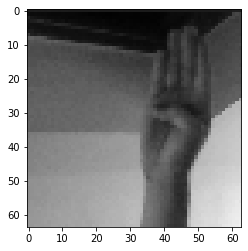

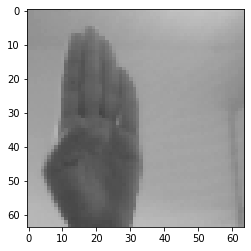

In [94]:

# train_df = pd.read_csv('train.csv')
# print(train_df.head())

img_index = 5000
arr = train_df.iloc[img_index, 1: ].values
print(labels[train_df.iloc[img_index, 0]])
img_arr = pd.DataFrame(arr.reshape(-1, 64)).set_index(0)

image2 = cv2.imread("gray.png", cv2.IMREAD_GRAYSCALE)
# image2 = cv2.flip(image2, 1)
image2 = cv2.resize(image2, (64, 64))

plt.imshow(img_arr, cmap='gray', vmin=0, vmax=255)
plt.show()

plt.imshow(image2, cmap='gray', vmin=0, vmax=255)
plt.show()

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from ast import literal_eval

KNN = KNeighborsClassifier(n_neighbors=5)


x_train = traindots_df.loc[:, traindots_df.columns != 'label'].values
y_train = traindots_df['label'].values

x_test = testdots_df.loc[:, testdots_df.columns != 'label'].values
y_test = testdots_df['label'].values

# print(x_train, y_train)
# print(x_train.size)
# print(x_test, y_test)

KNN.fit(x_train, y_train)

ValueError: malformed node or string: array([['[89, 117, 0]', '[114, 100, -7]', '[126, 75, -9]', ...,
        '(63, 35, 66, 82)', '(96, 76)', 1],
       ['[90, 118, 0]', '[112, 102, -6]', '[126, 76, -8]', ...,
        '(64, 37, 65, 81)', '(96, 77)', 1],
       ['[92, 118, 0]', '[114, 103, -6]', '[129, 77, -8]', ...,
        '(65, 38, 66, 80)', '(98, 78)', 1],
       ...,
       ['[120, 155, 0]', '[126, 135, -8]', '[126, 115, -14]', ...,
        '(38, 85, 88, 70)', '(82, 120)', 1],
       ['[122, 153, 0]', '[129, 132, -6]', '[128, 113, -10]', ...,
        '(40, 83, 89, 70)', '(84, 118)', 1],
       ['[124, 151, 0]', '[131, 131, -9]', '[130, 112, -14]', ...,
        '(42, 82, 89, 69)', '(86, 116)', 1]], dtype=object)

In [79]:
print("Accuracy: ", KNN.score(x_test, y_test))

Accuracy:  0.9285714285714286


In [96]:
toPredict = cv2.imread("gray.png", cv2.IMREAD_GRAYSCALE)
# toPredict = cv2.imread("aslabc/asl_alphabet_test/asl_alphabet_test/B_test.jpg", cv2.IMREAD_GRAYSCALE)
# toPredict = cv2.flip(toPredict, 1)
toPredict = cv2.resize(toPredict, (64, 64))
toPredict = toPredict.reshape(1, -1)
toPredicted = KNN.predict(toPredict)

print("AI: ", labels[toPredicted[0]])

AI:  I
